1. Importing Necessary Libraries



In [20]:
# pandas is imported to handle data manipulation and analysis.
import pandas as pd

# matplotlib is used for data visualization, specifically for plotting charts.
import matplotlib.pyplot as plt

# Prophet is used for time series forecasting.
from prophet import Prophet

# seaborn is imported for creating more aesthetic and advanced visualizations.
import seaborn as sns

# numpy is used for numerical computations.
import numpy as np

In [21]:
# Load the dataset from the Excel file
data=pd.read_excel("hourly_electricity.xlsx")

# Print the summary statistics of the data (mean, min, max, etc.)
print("Data Summary:\n",data.describe())

# Check for any missing values in the dataset
print("\nMissing Values : \n",data.isnull().sum())

print(data.head(5))

Data Summary:
                       date  consumption_mwh
count                65712     65712.000000
mean   2019-09-30 12:00:00     34117.584635
min    2016-01-01 00:00:00         0.000000
25%    2017-11-15 00:00:00     29979.812500
50%    2019-09-30 12:00:00     33964.600000
75%    2021-08-15 00:00:00     38185.832500
max    2023-06-30 00:00:00     55575.020000
std                    NaN      5541.475461

Missing Values : 
 date               0
hour               0
consumption_mwh    0
dtype: int64
        date      hour  consumption_mwh
0 2016-01-01  00:00:00         26277.24
1 2016-01-01  01:00:00         24991.82
2 2016-01-01  02:00:00         23532.61
3 2016-01-01  03:00:00         22464.78
4 2016-01-01  04:00:00         22002.91


2. Convert Hour to Time Format

In [22]:
# Convert the 'hour' column into a proper datetime time format
data["hour"]=pd.to_datetime(data["hour"],format="%H:%M:%S").dt.time

# Combine 'date' and 'hour' columns to create a single 'datetime' column
data["datetime"]=pd.to_datetime(data["date"].astype(str)+" "+data["hour"].astype(str))

print(data["datetime"])

# Set the 'datetime' column as the index of the DataFrame
data.set_index("datetime",inplace=True)

# Drop the old 'date' and 'hour' columns from the DataFrame
data.drop(["date","hour"],axis=1,inplace=True)

0       2016-01-01 00:00:00
1       2016-01-01 01:00:00
2       2016-01-01 02:00:00
3       2016-01-01 03:00:00
4       2016-01-01 04:00:00
                ...        
65707   2023-06-30 19:00:00
65708   2023-06-30 20:00:00
65709   2023-06-30 21:00:00
65710   2023-06-30 22:00:00
65711   2023-06-30 23:00:00
Name: datetime, Length: 65712, dtype: datetime64[ns]


3. Data Visualization


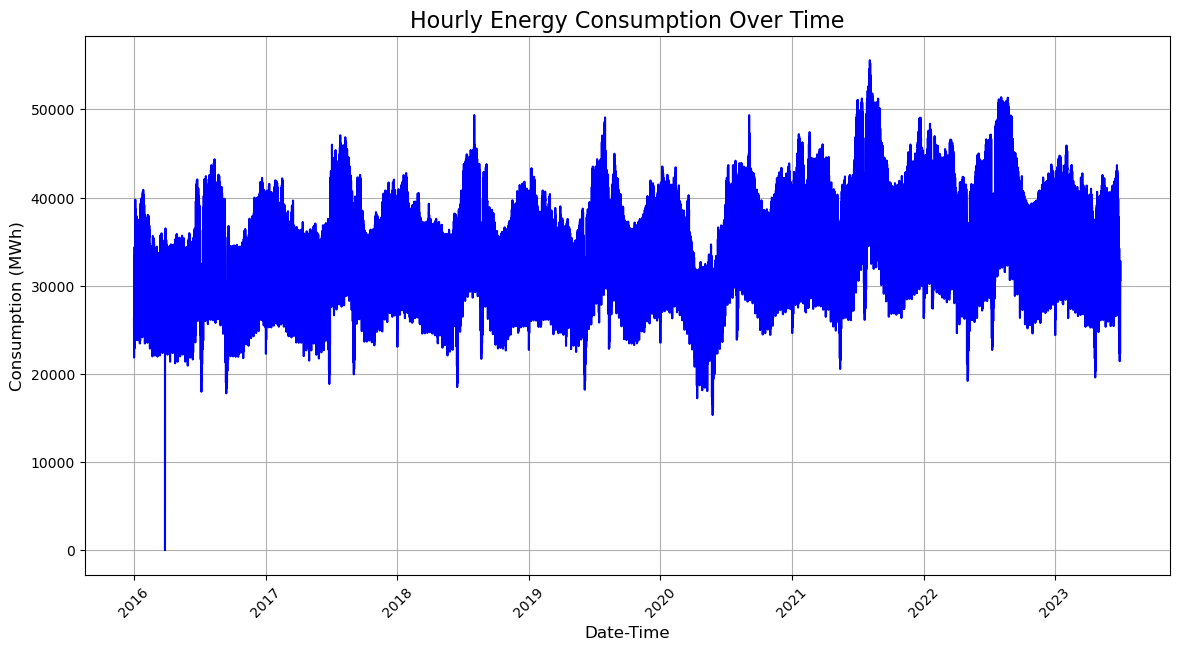

In [23]:
# Create a line plot to visualize the hourly energy consumption over time
plt.figure(figsize=(14,7))
sns.lineplot(x=data.index,y=data["consumption_mwh"],color="blue")

# Set the title and labels for the plot
plt.title("Hourly Energy Consumption Over Time",fontsize=16)
plt.xlabel("Date-Time",fontsize=12)
plt.ylabel("Consumption (MWh)",fontsize=12)

# Enable grid and rotate x-axis labels for better readability
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()


4. Preparing Data for Prophet Model


In [24]:
# Select only the 'consumption_mwh' column and reset the index to prepare data for Prophet
df_prophet=data[["consumption_mwh"]].reset_index()

# Rename the columns to match Prophet's expected format
df_prophet.columns=["ds","y"]

5. Fitting the Prophet Model


In [25]:
# Initialize the Prophet model with yearly and daily seasonality enabled
model=Prophet(yearly_seasonality=True,daily_seasonality=True)

# Fit the model with the prepared data
model.fit(df_prophet)

23:00:13 - cmdstanpy - INFO - Chain [1] start processing
23:00:43 - cmdstanpy - INFO - Chain [1] done processing


6. Prediction


In [26]:
# Get the last date from the dataset
last_date=df_prophet["ds"].max()

# Generate a range of future dates (6 years of daily data)
future_dates = pd.date_range(last_date, periods=365*7+1, freq='D')[1:]  # Adjust the periods to extend further

# Create a DataFrame for the future dates
future=pd.DataFrame(future_dates,columns=["ds"])

# Make predictions for the future dates using the model
forecast=model.predict(future)

7. Visualizing the Forecast Results


c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1400x700 with 0 Axes>

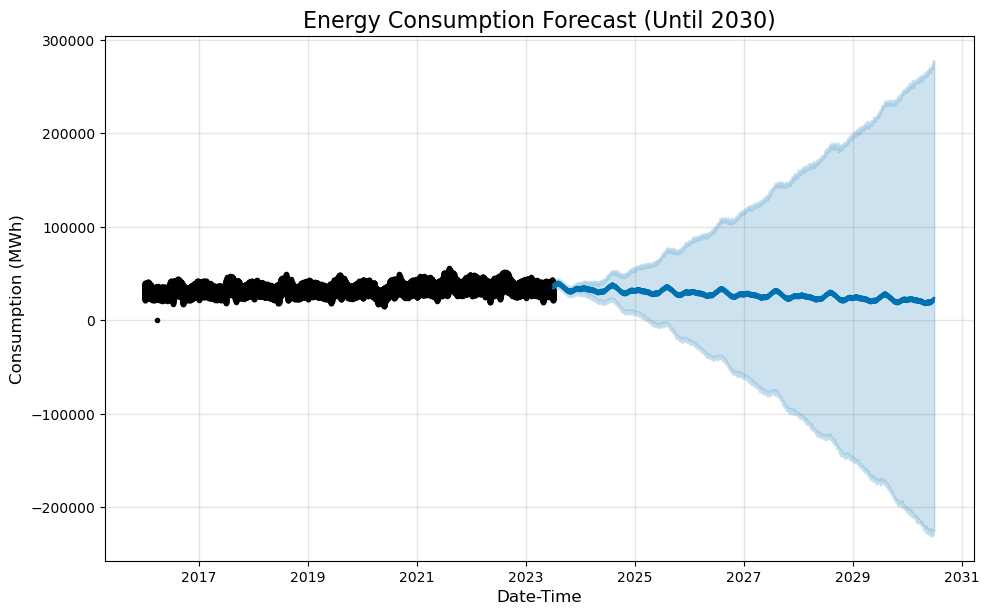

In [27]:
# Plot the forecasted energy consumption with confidence intervals
plt.figure(figsize=(14,7))
model.plot(forecast)

# Set the title and labels for the plot
plt.title("Energy Consumption Forecast (Until 2030)", fontsize=16)
plt.xlabel("Date-Time", fontsize=12)
plt.ylabel("Consumption (MWh)", fontsize=12)

# Display the plot with grid lines
plt.grid(True)
plt.show()


8. Visualizing Forecast Components


c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

<Figure size 1400x700 with 0 Axes>

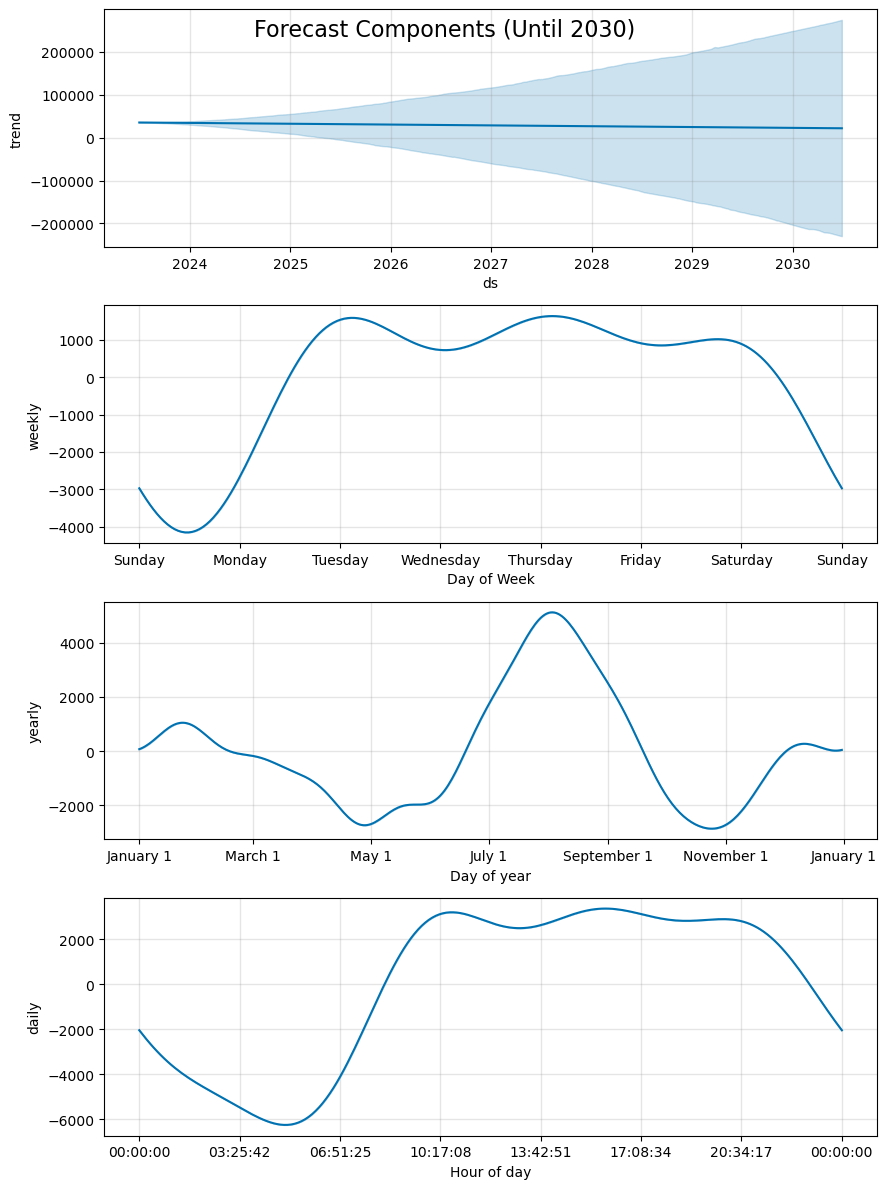

In [28]:
# Plot the individual components of the forecast (trend, yearly seasonality, etc.)
plt.figure(figsize=(14, 7))
model.plot_components(forecast)

# Display the plot of forecast components
plt.suptitle("Forecast Components (Until 2030)", fontsize=16)
plt.show()


9. Displaying Forecasted Values


In [29]:
# Print the first 10 forecasted values, including the predicted values and their confidence intervals
print("\nSample Forecasted Values (first 10 rows):")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))


Sample Forecasted Values (first 10 rows):
                   ds          yhat    yhat_lower    yhat_upper
0 2023-07-01 23:00:00  33961.739004  30983.224377  37089.075466
1 2023-07-02 23:00:00  33986.056403  30984.854945  37101.198720
2 2023-07-03 23:00:00  38466.301315  35171.885755  41808.331534
3 2023-07-04 23:00:00  37837.279052  34597.274413  40947.872535
4 2023-07-05 23:00:00  38803.632444  35865.062658  41863.850355
5 2023-07-06 23:00:00  38264.975291  35274.231789  41561.258784
6 2023-07-07 23:00:00  38383.968068  35294.155012  41593.708928
7 2023-07-08 23:00:00  34796.016379  31564.735553  37805.346805
8 2023-07-09 23:00:00  34817.845034  31664.324930  37957.774502
9 2023-07-10 23:00:00  39298.156467  35924.786789  42446.608958
